# Trabalho Final - Data Science using Python

### Delmar Hirtata - 1901786

In [205]:
# Importa bibliotecas utilizadas na análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [206]:
# Importa base de dados
cadastro_df = pd.read_csv("cadastro.csv", encoding = 'utf-8')
preco_df = pd.read_csv('preco da gasolina.csv', encoding = 'utf-8')
salario_df = pd.read_csv('salario_profissoes.csv', encoding = 'utf-8')

In [207]:
# Verificação do Dataframe
cadastro_df

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior
3,João,Aparecido,1950,m,Monte Alto,Gerente de Projeto,3,Viuvo,2,Nã faço nada,NaN,-,NaN,sim,Ensino Superior
4,Marta,da Silva,1983,f,São Caetano,Auxiliar de Enfermagem,2,Solteira,0,caminhar,sim,crossfit,4.0,não,Ensimo Tecnico
5,Vilma,Narsiza,1995,f,Minas Gerais,caixa de mercado,4,Solteira,4,barzinho com os amigos,sim,crossfit,3.0,não,Ensino Médio
6,Marcela,Santos,1987,f,Pernanbuco,Não informado,0,Viuvo,0,caminhar,não,-,0.0,sim,Ensino Médio
7,Joao,Victor,2001,m,São Paulo,estagiario,2,Solteiro,0,só jogo bola,sim,jogo bola,1.0,não,Ensino Superior
8,Marcos,Victor,1998,m,Rio de Janeiro,estagiario,1,Solteiro,0,fico em casa,não,-,0.0,sim,Ensino Superior
9,Mirtes,NaN,1976,f,Vitoria,Médica,5,Casada,2,leitura e ficar com os filhos,sim,crossfit,3.0,sim,Ensino Superior


### 1 - Qual a idade média das pessoas no cadastro ?

In [208]:
# Criação da coluna idade no dataframe por função.
def idade(ano):
    idade = 2021 - ano
    return idade
cadastro_df['idade'] = idade(cadastro_df['ano_nascimento'])

In [209]:
# Também temos a opção de criar a coluna idade diretamento no dataframe.
# Não utilizado neste trabalho
'''
cadastro_df['idade'] = 2021-cadastro_df['ano_nascimento']
'''

"\ncadastro_df['idade'] = 2021-cadastro_df['ano_nascimento']\n"

In [210]:
# Cálculo da média da idades no dataframe.
media_idades = cadastro_df['idade'].mean()
print('A média de idade é de {:5.2f} anos.'.format(media_idades))

A média de idade é de 33.73 anos.


### 2 - Quantos homens tem no cadastro ?
### 3 - Quantas mulheres tem no cadastro ?

In [211]:
# Caolculo de pessoas cadastradas
total = cadastro_df['sexo'].count()
print('O total de pessoas cadastradas é de {} pessoas'.format(total))

O total de pessoas cadastradas é de 30 pessoas


In [212]:
# Verificando quantidade de homes e mulheres pelo método "groupby"
cadastro_df[['sexo','nome']].groupby('sexo').count()

,nome
sexo,
f,14
m,16


In [213]:
# Verificando quantidade de homes e mulheres por função

def tipo_sexo(cadastro_df):
    homem = 0
    mulher = 0
    
    for i in cadastro_df['sexo']:
        if i == "m":
            homem += 1
        else:
            mulher += 1
    return print('Temos {} homens e {} mulheres'.format(homem, mulher))


In [214]:
tipo_sexo(cadastro_df)

Temos 16 homens e 14 mulheres


# 4 - Qual a idade média dos homens e das mulheres ?

In [215]:
t_homem = 0
t_mulher = 0

for i in cadastro_df['sexo']:
    if i == "m":
        
        t_homem = t_homem + cadastro_df['idade']
    else:
        
        t_mulher = t_mulher + cadastro_df['idade']
    

In [216]:
cadastro_df.groupby('sexo').idade.mean()

sexo
f    34.857143
m    32.750000
Name: idade, dtype: float64

# 5 - Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro.

In [217]:
# Ajustando grafia do campo escolaridade

cadastro_df = cadastro_df.replace('Ensimo Tecnico', 'Ensino Tecnico')
cadastro_df = cadastro_df.replace('ensino Médio', 'Ensino Médio')
cadastro_df = cadastro_df.replace('ensino médio', 'Ensino Médio')
cadastro_df = cadastro_df.replace('ensino superior', 'Ensino Superior')


In [218]:
# Criação da coluna qtd_escolar diretamento no dataframe.
cadastro_df['qtd_escolar'] = 1

In [219]:
# Criação de Dataframe agrupodo por escolaridade
escolaridade = cadastro_df.groupby('escolaridade')

In [220]:
# Soma
escolaridade.sum()

,ano_nascimento,experiencia profissional,filhos,quanta_vezes_na_semana_pratica_esporte,idade,qtd_escolar
escolaridade,,,,,,
Ensino Médio,15898,14,16,8.0,270,8
Ensino Superior,41737,76,22,44.0,704,21
Ensino Tecnico,1983,2,0,4.0,38,1


<AxesSubplot:xlabel='escolaridade'>

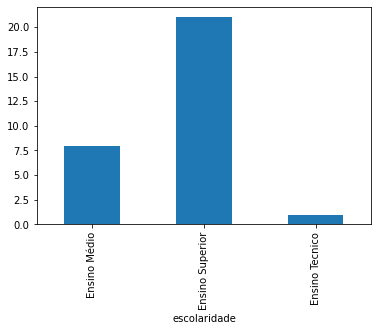

In [221]:
# Plotando Gráfico de Barras
escolaridade.sum()['qtd_escolar'].plot(kind='bar',x='escolaridade',y='quantidade')

# 6 - Mostre a Média Salarial do cadastro 

In [222]:
# Renomeando nome coluna e criando novo dataframe
salario_novo = salario_df.rename(columns = {'Profissões':'profissão'})

In [223]:
# Merge dos dataframes de cadastro e salario
merge_df = pd.merge(salario_novo,cadastro_df, on = 'profissão')

In [224]:
# Função para definição do salário e criação de coluna
def salario_ajustado(merge_df):
    for cad in merge_df['experiencia profissional']:
        if(cad <= 3):
            merge_df['salario'] = merge_df['salario até 3 anos']
        else:
            merge_df['salario'] = merge_df['salaior +3 anos']
    return merge_df

In [225]:
# Adicionando coluna no dataframe
merge_df = salario_ajustado(merge_df)

In [226]:
# Cálculo da média do salario no dataframe.
media_salario = merge_df['salario'].mean()
print('A média salarial é de R$ {:6.2f}.'.format(media_salario))

A média salarial é de R$ 3486.21.


# 7 - Quem tem o maior salario

In [227]:
# Maior salário
merge_df['salario'].max()

12000

In [228]:
# Utilizando o groupby para verficar a profissão com maior salário
merge_df.groupby('profissão').salario.max()


profissão
Analista de Sistemas       4000
Autonoma                   7000
Auxiliar de Enfermagem     1500
Biomedica                  2500
Caminhoneiro               5000
Cientista de Dados        10000
Comercio Exterior          2800
Dentista                   8000
Enfermeira                 3000
Frentista                  2000
Gerente Financeiro         4500
Gerente Geral              3400
Gerente de Projeto         5000
Médica                    12000
Nutricionista              4000
Pedreiro                   3000
Professora                 3500
Recursos Humanos           2500
caixa de mercado            900
desempregado                  0
dona de casa               1200
estagiario                 1400
estudante                     0
Name: salario, dtype: int64

# 8 - Tirando desempregado quem recebe menos

In [229]:
# Ordena dataframe pela coluna salário
a = merge_df.sort_values(['salario'])

In [230]:
# Imprimi colunas salário e profissão. 
# Deste mode é possivel verificar a profissão com menor salário
a[['salario', 'profissão']]

,salario,profissão
2,0,desempregado
3,0,desempregado
10,0,estudante
11,0,estudante
6,900,caixa de mercado
1,1200,dona de casa
7,1400,estagiario
8,1400,estagiario
5,1500,Auxiliar de Enfermagem
24,2000,Frentista


### Tirando a profissão sem rendimento (desempregado e estudante) o menor salário é do Caixa de Mercado

# 9 - Quantas pessoas gostam de caminhar no final de semana 

In [231]:
# Ajustando grafia do campo lazer_final_de_semana

merge_df = merge_df.replace('caminhar, ficar com os filhos', 'caminhar')
merge_df = merge_df.replace('caminhar, ler livros e ficar com o filho', 'caminhar')

In [232]:
# Verificando quantidade de homes e mulheres pelo método "groupby"
merge_df[['lazer_final_de_semana','nome']].groupby('lazer_final_de_semana').count()

,nome
lazer_final_de_semana,
Nã faço nada,1
"academia, limpeza de casa",1
barzinho com os amigos,1
barzinho com os amigos e descançar,2
caminhar,3
churrasco,1
correr e ficar com os amigos,1
correr na rua,1
"correr, ler, estudar e ficar com os amigos",2


### Quatro pessoas caminham no final de semana

# 10 - Crie um gráfico mostrando entre a relação de escolaridade e quem pratica esporte 

In [233]:
# Exclui os valores nulos
merge_df.dropna(subset=['pratica_esporte'], inplace = True)
merge_df.shape

(28, 20)

In [234]:
# Agrupar escolaridade e Pratica_esporte
# Na tabela apresentada já é possivel verificar a relação escolaridade e pratica esportiva
c=merge_df[['escolaridade', 'pratica_esporte','qtd_escolar']].groupby(['escolaridade', 'pratica_esporte']).sum()
c

qtd_escolar
escolaridade    pratica_esporte             
Ensino Médio    não                        4
                sim                        3
Ensino Superior não                        5
                sim                       15
Ensino Tecnico  sim                        1

<AxesSubplot:xlabel='escolaridade,pratica_esporte'>

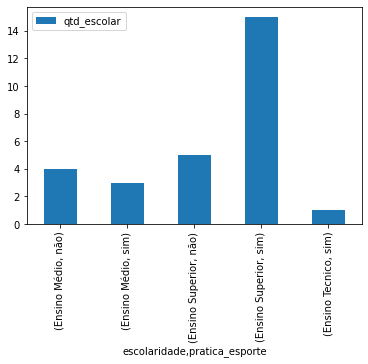

In [235]:
# Impressão do gráfico de barra onde é possivel analisar a relação
c.plot.bar()

# 11 - Crie um mapa de calor 

In [236]:
calor = merge_df.corr()

<AxesSubplot:>

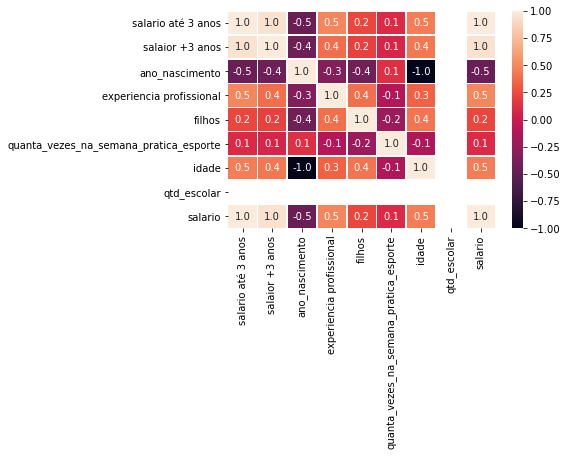

In [237]:
#Impessão do mapa de calor
mapa = sn.heatmap(calor, annot = True, fmt=".1f", linewidths=.6)
mapa

# 12 - Mostre de forma gráfica a distribuição de estados do cadastro 

In [238]:
# Agrupar por cidade
cidade = cadastro_df.groupby('cidade')

<AxesSubplot:xlabel='cidade'>

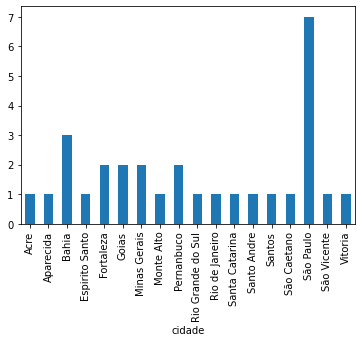

In [239]:
# Gráfico de barras
cidade.sum()['qtd_escolar'].plot(kind='bar',x='cidade',y='qtd_escolar')